# Leaf classification



[Classifying leaves](https://dykuang.github.io/posts/2018/02/Classifying%20leaves/)

https://dykuang.github.io/posts/2018/02/Classifying%20leaves/


# Prepare dataset

The dataset is available on [Kaggle](https://www.kaggle.com/c/leaf-classification/data)

In [1]:
# prepare dataset
import os, sys
import pandas as pd

# load csv with labels and features of the images for training
filename = "train.csv"
filepath = os.path.join("/media/data/datasets", filename)

df = pd.read_csv(filepath, sep=",")

In [10]:
df.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

Let's check the dataset (number of instances and columns).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
df.values.shape

(990, 194)

The dataset contains 194 columns (id, species, and attributes) and 9990 examples. Notice that the `id` column goes from 1 to 1584. Hoewer, the index goes from 1 to 990 only. That is, not all the images are labeled in the csv file. Now, le's check the number of instances per class.

In [8]:
df["species"]

0                       Acer_Opalus
1             Pterocarya_Stenoptera
2              Quercus_Hartwissiana
3                   Tilia_Tomentosa
4                Quercus_Variabilis
5              Magnolia_Salicifolia
6               Quercus_Canariensis
7                     Quercus_Rubra
8                   Quercus_Brantii
9                    Salix_Fragilis
10                  Zelkova_Serrata
11            Betula_Austrosinensis
12                  Quercus_Pontica
13                   Quercus_Afares
14                Quercus_Coccifera
15                  Fagus_Sylvatica
16                      Phildelphus
17                    Acer_Palmatum
18                Quercus_Pubescens
19                Populus_Adenopoda
20                  Quercus_Trojana
21               Quercus_Variabilis
22                Alnus_Sieboldiana
23                     Quercus_Ilex
24              Arundinaria_Simonii
25                  Acer_Platanoids
26           Quercus_Phillyraeoides
27                 Cornus_Ch

<IPython.core.display.Javascript object>


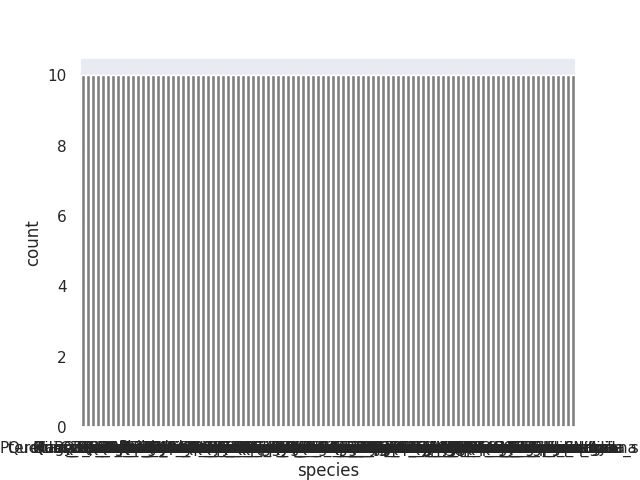

In [13]:
%matplotlib notebook
import seaborn as sns
sns.set()

sns.countplot(df["species"], color="gray");

<IPython.core.display.Javascript object>


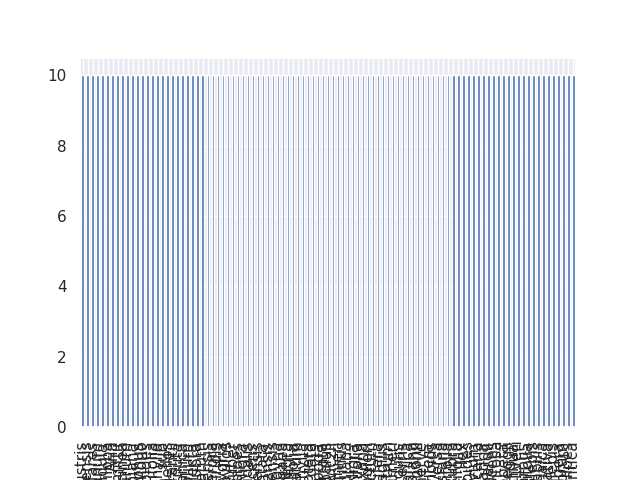

In [12]:
%matplotlib notebook

df["species"].value_counts().plot(kind='bar');

From the above plots, we can see that there are 10 examples for each class. In addition, there are 99 classes as shown below (see `Length: 99`):

In [7]:
df["species"].value_counts()

Quercus_Palustris               10
Cornus_Chinensis                10
Quercus_Afares                  10
Rhododendron_x_Russellianum     10
Betula_Pendula                  10
Ginkgo_Biloba                   10
Sorbus_Aria                     10
Prunus_X_Shmittii               10
Quercus_Coccinea                10
Acer_Saccharinum                10
Ulmus_Bergmanniana              10
Phildelphus                     10
Acer_Mono                       10
Viburnum_x_Rhytidophylloides    10
Quercus_Semecarpifolia          10
Cornus_Macrophylla              10
Quercus_Infectoria_sub          10
Quercus_Phellos                 10
Quercus_Brantii                 10
Ilex_Cornuta                    10
Quercus_Vulcanica               10
Ilex_Aquifolium                 10
Eucalyptus_Neglecta             10
Alnus_Rubra                     10
Acer_Palmatum                   10
Quercus_Canariensis             10
Salix_Intergra                  10
Alnus_Viridis                   10
Cotinus_Coggygria   

In [9]:
len(df["species"].unique())

99

The following block splis the images into training and test sets. The number of images per class is limited, so we use 6 for training and 4 for testing.

In [ ]:
from __future__ import print_function
import os, shutil

# original dataset
original_dataset_dir = "/media/data/datasets/images"

# create directories
base_dir = "/media/data/datasets/leafs"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

if not os.path.isdir(base_dir):
    os.mkdir(base_dir)
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

for class_name in df["species"].unique():
    
    # create directory for this class
    dir_test = os.path.join(test_dir, class_name)
    dir_train = os.path.join(train_dir, class_name)
    os.mkdir(dir_test)
    os.mkdir(dir_train)
    
    # select all the images of this class
    to_keep = df["species"] == class_name
    
    # select the first 6 images for training
    train_set = df["id"][to_keep][:6]
    
    # select the next 4 images for testing
    test_set = df["id"][to_keep][6:]
    
    # save train images
    for img_id in train_set:
    
        filename = "%s.jpg" % img_id
        src = os.path.join(original_dataset_dir, filename)
        dst = os.path.join(dir_train, filename)
        shutil.copyfile(src, dst)
        
    # save test images
    for img_id in test_set:
    
        filename = "%s.jpg" % img_id
        src = os.path.join(original_dataset_dir, filename)
        dst = os.path.join(dir_test, filename)
        shutil.copyfile(src, dst)
        
print("OK")

In [50]:
# Example of indexing
to_keep = df["species"] == "Acer_Opalus"
names = df["id"][to_keep]
print(names)

print("training\n", names[:6])
print("testing\n", names[6:])

0         1
180     317
568     906
633    1002
702    1125
720    1159
791    1270
821    1320
903    1450
934    1504
Name: id, dtype: int64
training
 0         1
180     317
568     906
633    1002
702    1125
720    1159
Name: id, dtype: int64
testing
 791    1270
821    1320
903    1450
934    1504
Name: id, dtype: int64


Now, let's create a simple generator for showing a few images:

In [123]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen_base = ImageDataGenerator(
                    rescale=1./255
                    )

train_generator_base = train_datagen_base.flow_from_directory(
                        train_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode="categorical",
                        seed=42,
                        shuffle=False
                        )

# dictionary with classes
# {'Acer_Capillipes': 0,
# 'Acer_Circinatum': 1,
# 'Acer_Mono': 2,
# ...
# 'Viburnum_x_Rhytidophylloides': 97,
# 'Zelkova_Serrata': 98}
class_indices_base = train_generator_base.class_indices
class_indices_base_rev = {val:key for key, val in class_indices_base.items()}

Found 594 images belonging to 99 classes.


In [122]:
def show_batch_small_grid(images, labels, class_indices_rev):
    """
    Display a (2, 7) grid of images
    """
    
    count = 0
    
    fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(18, 5), facecolor="#f0f0f0",
                            subplot_kw={"xticks": [], "yticks": []})
    
    for image, label_one_hot, ax in zip(images, labels, axes.flat):
        
        label_id = int(label_one_hot.argmax())
        label = "%d %s" % (label_id, class_indices_rev[label_id])
        ax.imshow(image)
        ax.set_title(label)
        
        # stopping condition
        count+=1
        if count >= 14:
            break
            
    # adjust margins
    fig.subplots_adjust(left=0.05,
                        bottom=0.05,
                        right=0.95,
                        top=0.95,
                        wspace=0.2,
                        hspace=0.2,
                        )
    plt.show()

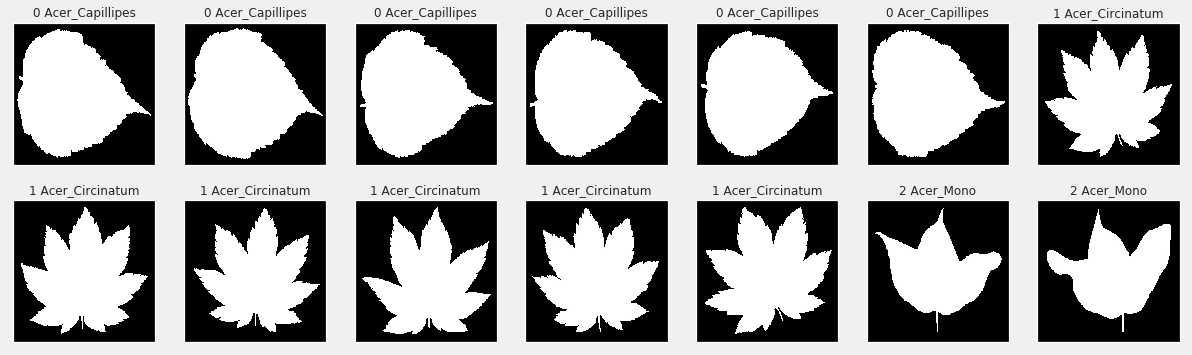

In [124]:
%matplotlib inline  

# reset datagenerator
# comment this line to see a different batch every time
#train_generator_base.reset()

for images, labels in train_generator_base:
    
    show_batch_small_grid(images, labels, class_indices_base_rev)
    
    break

The previous block shows a few of the training images. We can also use data augmentation to increase the number of training samples:

In [125]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    )

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode="categorical",
                        seed=42,
                        shuffle=False
                        )

# dictionary with classes
# {'Acer_Capillipes': 0,
# 'Acer_Circinatum': 1,
# 'Acer_Mono': 2,
# ...
# 'Viburnum_x_Rhytidophylloides': 97,
# 'Zelkova_Serrata': 98}
class_indices = train_generator.class_indices
class_indices_rev = {val:key for key, val in class_indices.items()}

Found 594 images belonging to 99 classes.


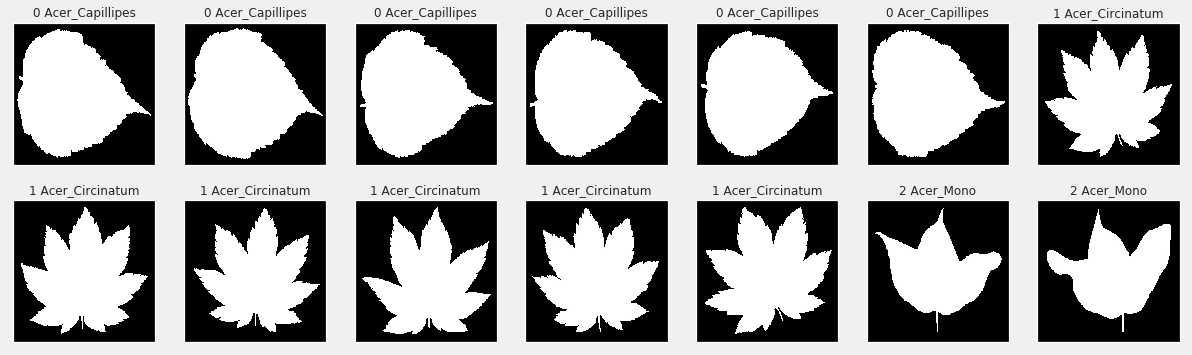

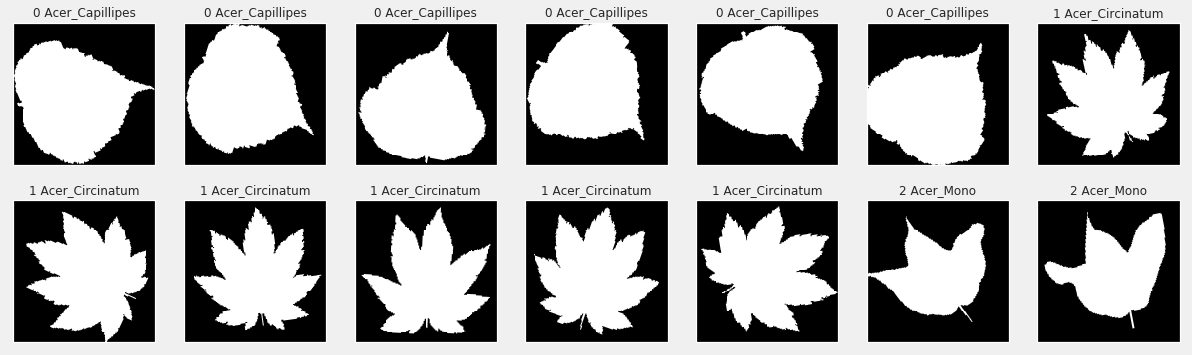

In [133]:
%matplotlib inline  

# reset datagenerator
# comment this line to see a different batch every time
train_generator_base.reset()
train_generator.reset()

# use this additional line to guarantee reproducibility of results in the second generator each time
#train_generator.total_batches_seen = 0

# base generator
for images, labels in train_generator_base:
    show_batch_small_grid(images, labels, class_indices_base_rev)
    break

# data augmentation
for images, labels in train_generator:
    show_batch_small_grid(images, labels, class_indices_rev)
    break

As it can be seen, the previous block shows how the images rotates. This way, we can create more images for training. Now, let's add more transformations:

In [137]:
from keras.preprocessing.image import ImageDataGenerator

# note: the transfor may cause occulusion (ie, large parts of the object we want to classify are hidden from the view of the image)
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    width_shift_range=0.2,   
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode="nearest",
                    )

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode="categorical",
                        seed=42,
                        shuffle=False
                        )

# dictionary with classes
# {'Acer_Capillipes': 0,
# 'Acer_Circinatum': 1,
# 'Acer_Mono': 2,
# ...
# 'Viburnum_x_Rhytidophylloides': 97,
# 'Zelkova_Serrata': 98}
class_indices = train_generator.class_indices
class_indices_rev = {val:key for key, val in class_indices.items()}

Found 594 images belonging to 99 classes.


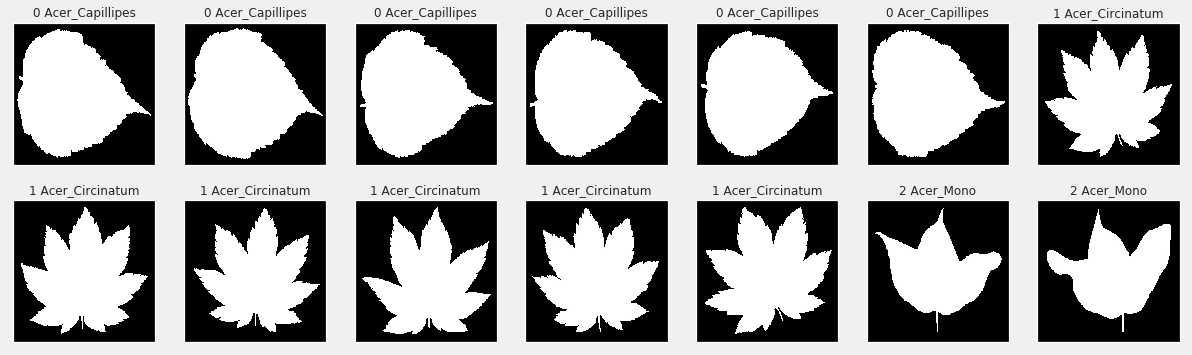

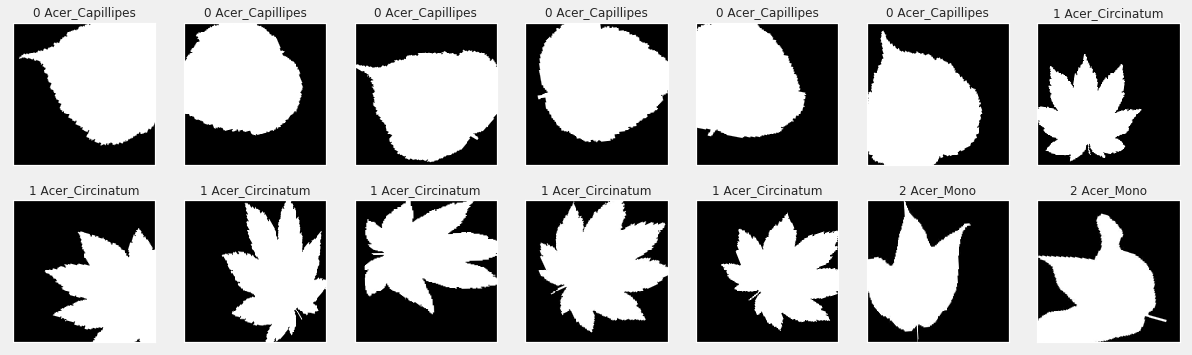

In [138]:
%matplotlib inline  

# reset datagenerator
# comment this line to see a different batch every time
train_generator_base.reset()
train_generator.reset()

# use this additional line to guarantee reproducibility of results in the second generator each time
#train_generator.total_batches_seen = 0

# base generator
for images, labels in train_generator_base:
    show_batch_small_grid(images, labels, class_indices_base_rev)
    break

# data augmentation
for images, labels in train_generator:
    show_batch_small_grid(images, labels, class_indices_rev)
    break

# Create model

In [144]:
from keras import layers
from keras import models
from keras import optimizers
import numpy as np

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(99, activation="softmax"))

model.compile(
            optimizer=optimizers.RMSprop(lr=2e-5),
            loss="categorical_crossentropy",
            metrics=["acc"])

# step = number_of_samples/generator.batch_size
step = int(np.ceil(train_generator.n/train_generator.batch_size))

history = model.fit_generator(
            train_generator,
            steps_per_epoch=step,
            epochs=100
            )



W0317 17:51:08.489680 139698154923776 deprecation.py:323] From /home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0317 17:51:08.643761 139698154923776 deprecation_wrapper.py:119] From /home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
30/30 [==============================] - 17s 551ms/step - loss: 4.7882 - acc: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 14s 465ms/step - loss: 4.6781 - acc: 0.0033
Epoch 3/100
30/30 [==============================] - 14s 461ms/step - loss: 4.6620 - acc: 0.0017
Epoch 4/100
30/30 [==============================] - 14s 459ms/step - loss: 4.6477 - acc: 0.0024
Epoch 5/100
30/30 [==============================] - 14s 460ms/step - loss: 4.6350 - acc: 0.0017
Epoch 6/100
30/30 [==============================] - 14s 458ms/step - loss: 4.6202 - acc: 0.0000e+00
Epoch 7/100
30/30 [==============================] - 14s 461ms/step - loss: 4.6123 - acc: 0.0097
Epoch 8/100
30/30 [==============================] - 14s 459ms/step - loss: 4.6030 - acc: 0.0033
Epoch 9/100
30/30 [==============================] - 14s 460ms/step - loss: 4.5952 - acc: 0.0074
Epoch 10/100
30/30 [==============================] - 14s 463ms/step - loss: 4.5838 - acc: 0.0067
Epoch 11/100
30/30 [=

30/30 [==============================] - 14s 459ms/step - loss: 4.1081 - acc: 0.0404
Epoch 85/100
30/30 [==============================] - 14s 461ms/step - loss: 4.0734 - acc: 0.0351
Epoch 86/100
30/30 [==============================] - 14s 459ms/step - loss: 4.0470 - acc: 0.0444
Epoch 87/100
30/30 [==============================] - 14s 457ms/step - loss: 4.0616 - acc: 0.0481
Epoch 88/100
30/30 [==============================] - 14s 461ms/step - loss: 4.0784 - acc: 0.0518
Epoch 89/100
30/30 [==============================] - 14s 462ms/step - loss: 4.0752 - acc: 0.0371
Epoch 90/100
30/30 [==============================] - 14s 459ms/step - loss: 4.0808 - acc: 0.0447
Epoch 91/100
30/30 [==============================] - 14s 460ms/step - loss: 4.0620 - acc: 0.0447
Epoch 92/100
30/30 [==============================] - 14s 458ms/step - loss: 4.0607 - acc: 0.0388
Epoch 93/100
30/30 [==============================] - 14s 459ms/step - loss: 4.0572 - acc: 0.0411
Epoch 94/100
30/30 [=============

In [141]:
train_generator.n

594

In [142]:
train_generator.batch_size

20